# Machine Learning Workshop: Week 4
In this workshop, you will use Python to implement the KNN (DO NOT USE PYTHON LIBARIES OF KNN) introduced in the Lecture on the iris dataset. You will also be asked to use SVM algorithms available in scikit-learn to do classification on other datasets.

### Iris dataset description
The IRIS dataset is a good example of multi-classification. The dataset we will use has 150 observations of iris flowers from three different species, hence three classes: setosa, versicolor and virginica. There are four attributes in the data: sepal length, sepal width, petal length and petal width.
 
 The data can be loaded from `sklearn' using Python. 
 
 >from sklearn import datasets
 
 >iris=datasets.load_iris()


## Excercise 1:
Your code to implement KNN algorithm should include the following functions:

a. Load the data set; return 90% as train data and 10% as test data 

b. Normalize the features

c. Calculate the Euclidean distance between any two points

d. Find the neighbours given a test data point and number k

e. Get the class labels; you should also handle ties

f. Calculate prediction accuracy

Note: you need to implement each function yourself instead of using python libraries.


In [1]:
from sklearn import datasets, preprocessing
import numpy as np
import math
import operator
rate = 0.9
k = 3

# This function is to load the IRIS data, shuffle it and split it into training and test
# data set
def get_data():
    # load data
    iris = datasets.load_iris()
    iris_feature=iris.data
    iris_label=iris.target
                          
    num_sample=len(iris_label)
    #iris_label=np.reshape(iris_label,(num_sample,))
    
    iris_normalised_feature=normalise(iris_feature)
    
    iris_data=np.column_stack((iris_normalised_feature, iris_label))
    np.random.shuffle(iris_data)
    
    
    iris_train=iris_data[0:int(rate*num_sample),:]
    iris_test=iris_data[int(rate*num_sample):,:]
    return iris_train, iris_test
    #iris_train, iris_test = get_data()

In [2]:
# This function is to normalise the data features, each feature is normalised to norm 1
def normalise(data):
    feature=data[:,0:4]
    # normalise data features
    #     normalised_feature=preprocessing.normalise(feature,'l2', axis=0)
    max_feature=np.max(feature)
    min_feature=np.min(feature)
    normalised_feature=(feature-min_feature)/(max_feature-min_feature)
    
    return normalised_feature
    #data_normalised = normalise(iris_train)

In [3]:
# This function is to calculate Euclidean distance between two samples
def getdistance(sample1, sample2):
    # Euclidean distance between two samples
    length = len(sample1)
    dist = 0
    for i in range(length):
        dist += pow(sample1[i]-sample2[i], 2)
    return math.sqrt(dist)
    #dist = getdistance(data_normalised[0,:],data_normalised[1,:])

In [4]:
# This function is to find the k neighbours for the test sample from traning samples
def findNeighbours(training_data, test_sample, k):
# find the k neighbours for the test sample from traning samples
    distances = []
    for i in range(len(training_data)):
        dist = getdistance(test_sample[0:-1], training_data[i,0:-1])
        distances.append((training_data[i],dist))

    distances.sort(key=operator.itemgetter(1))
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours
    #neighbours = findNeighbours(iris_train, iris_test[0,:], k)
    

In [5]:
# This function is to find the most probable neighbour
def getClass(neighbours):
# find the most probable neighbour
    classvotes = {}
    for i in range(len(neighbours)):
        response = neighbours[i][-1]
    if response in classvotes:
        classvotes[response] += 1
    else:
        classvotes[response] = 1
        
    sortedVotes = sorted(classvotes, reverse=True)
    return sortedVotes[0]
    #votes = getClass(neighbours)

In [6]:
# This function is to calculate accuracy
def get_accuracy(test_sample, prediction):
    correct = 0
    for i in range(len(test_sample)):
        if test_sample[i][-1] == prediction[i]:
            correct += 1
    
    rate_correct = (correct/len(test_sample))* 100.0
    return rate_correct

In [7]:
# This is the main function which shall call the functions you write above and realise classification 
def main():
    # obtain data
    iris_train, iris_test = get_data()
    # obtain predictions
    predictions = []
    for i in range(len(iris_test)):
        neighbours = findNeighbours(iris_train, iris_test[i,:], k)
        votes = getClass(neighbours)
        predictions.append(votes)
        print('> predicted=' + repr(votes) + ', actual=' + repr(iris_test[i][-1]))
        
    accuracy = get_accuracy(iris_test,predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

> predicted=2.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=0.0, actual=0.0
> predicted=0.0, actual=0.0
> predicted=1.0, actual=1.0
> predicted=2.0, actual=2.0
> predicted=0.0, actual=0.0
> predicted=2.0, actual=2.0
> predicted=1.0, actual=1.0
> predicted=1.0, actual=1.0
Accuracy: 93.33333333333333%


### Excercise 2:

You have learnt SVM for binary classification. Now it is time to test your learning for classifying a real dataset with binary labels. The data you are going to use is the breast cancer dataset provided by scikit-learn, each record of which has 10 attributes of cell nucleus (radius, texture, perimeter, area, etc.) and a class lable with malignant (begign) indicating cancerous (non-cancerous).

The dataset can be loaded from `sklearn' using Python. 

 >from sklearn import datasets
 
 >iris=datasets.load_breast_cancer()


Your SVM code should include the following functions:

a. Load the data set; return 70% as train data and 30% as test data (you can use train_test_split function)

b. Visualise the relationship between petal (sepal) and target classes: petal (sepal) length values on X-axis and width values on Y-axis.

c. Build SVMs with four different kernels (linear, RBF, sigmoid, polynomial)

d. Create confusion matrix and classification report (which is described later)

f. Create receiver operating characteristic (ROC) curve

In [8]:
# Required Packages
from sklearn import datasets		# To Get iris dataset
from sklearn import svm    			# To fit the svm classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt            # To visuvalizing the data
import warnings
warnings.filterwarnings("ignore")

In [9]:
# load cancer data from sklearn library
cancer=datasets.load_breast_cancer()
X = cancer.data
Y = cancer.target

# Create a dataframe and add additional column taget 
data_frame = pd.DataFrame(X, columns=cancer.feature_names)
data_frame['target']=Y
data_frame.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### Now do SVM classification

In [10]:
# split the dataset using 70% for training and the remaining 30% for testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)

In [11]:
C = 1.0  # SVM regularization parameter: penalise misclassified examples
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear').fit(X_train, Y_train)

# get the prediction for each SVM
svc_pred = svc.predict(X_test)


#### Create a confusion matrix and classification report for a classifer on test set.

Confusion matrix has been mentioned in week 2 lecture.

Classification report provides a good way to summarise the prediction power of classifiers. Here are two links to help you understand how it works:
    
https://muthu.co/understanding-the-classification-report-in-sklearn/

http://www.thedatalife.com/classification-report-python/

In what follows you are given an example on how to do this

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
svc_cm=np.array(confusion_matrix(Y_test, svc_pred, labels=[1,0]))
svc_confusion=pd.DataFrame(svc_cm, index=['actual_cancer', 'actual_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
print(svc_confusion)

                predicted_cancer  predicted_healthy
actual_cancer                107                  3
actual_healthy                 1                 60


In [13]:
# display classification report
print(classification_report(Y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.99      0.97      0.98       110

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



#### ROC CURVE

ROC Curve (Receiver Operating Characteristics)  is a performance measurement for classification problem at various thresholds settings. It tells how much model is capable of distinguishing between classes.

sklearn provides the *roc_curve* function to create a series of FPR and TPR pairs for different classification threshold values. The following examples show you have a ROC curve is created for SVC on the cancer dataset. Can you do the same thing for the other three classifiers ?

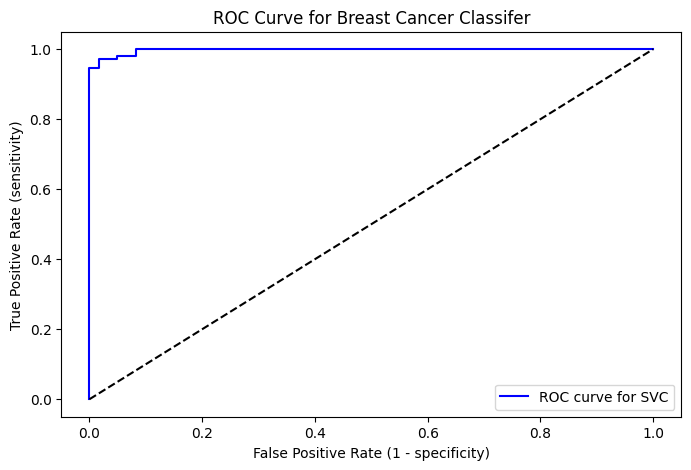

In [14]:
# import the roc_curve library
from sklearn.metrics import roc_curve
# calculate the decision function value for each data point, which is the value of w^Tx+w_0 in SVM
y_score = svc.decision_function(X_test) 

# please note the difference between decision_function and predict in the output 
# if you want to know how different they are, just print the ouput values:
# y_pred=svc.predict(X_test)
# print(y_score, y_pred)

# get pairs of FPR and TPR for different threshold values
fpr, tpr, thresholds = roc_curve(Y_test, y_score)
 
# plot the roc_curve
fig, ax = plt.subplots(1, figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve for SVC')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC Curve for Breast Cancer Classifer')
plt.legend(loc="lower right")